In [1]:
from functions import *
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import shap
from collections import Counter

## Data Preprocessing

In [2]:
path_1 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Processed Data/Merged/BHT1_merged.csv"
path_2 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Processed Data/Merged/BHT2_merged.csv"
path_3 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Processed Data/Merged/BHT3_merged.csv"

BHT_1 = pd.read_csv(path_1, sep=',')
BHT_2 = pd.read_csv(path_2, sep=',')
BHT_3 = pd.read_csv(path_3, sep=',')


In [3]:
## set modules
module1 = ['M01_1_N', 'M02_1_N', 'M03_1_N', 'M04_1_N', 'M05_1_N', 'M06_1_N']

module2 = [
            'M01_2_N', 'M02_2_N', 'M03_2_N', 'M04_2_N', 'M05_2_N', 'M06_2_N',
            'M07_2_N', 'M08_2_N', 'M09_2_N', 'M10_2_N', 'M11_2_N', 'M12_2_N',]

module3 = ['M01_3_N', 'M02_3_N', 'M03_3_N', 'M04_3_N', 'M05_3_N', 'M06_3_N',
            'M07_3_N', 'M08_3_N', 'M09_3_N', 'M10_3_N', 'M11_3_N', 'M12_3_N',
            'M13_3_N', 'M14_3_N', 'M15_3_N', 'M16_3_N', 'M17_3_N']

### Train test split function

### Search Space / Param Grid 

In [4]:
from hyperopt import *
search_space = {
    'n_estimators': hp.choice('n_estimators', list(range(5, 100, 5))),  # Number of boosting rounds
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.8),  # Step size shrinkage
    'booster': hp.choice('booster', ['gbtree']),
    'max_depth': hp.choice('max_depth', list(range(4, 12))),  # Tree depth
    'subsample': hp.uniform('subsample', 0.4, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.4, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0.01, 0.1),  # L2 regularization term on weights
    'min_child_weight': hp.uniform('min_child_weight', 0.1, 2),  # Minimum sum of instance weight in a child
    'scale_pos_weight': hp.uniform('scale_pos_weight', 0.1 , 2.5),  # Balancing class weights for imbalanced dat
}


## BHT semester 1

In [5]:
hpo = ModelTrainer(random_state=42)

# Count occurrences of each unique value in the 'status' column
counter_1 = Counter(BHT_1['status'])
print(f'Quantity of Drop Out and Degree in THL-1: \n 1: {counter_1[1]} | 0: {counter_1[0]}')
x, y = hpo.split_data(BHT_1, module1)

Quantity of Drop Out and Degree in THL-1: 
 1: 280 | 0: 59


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:02<00:00,  3.56trial/s, best loss: -0.6694949494949495]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            08               04
	 actual 1            08               48

Model parameters:
{'objective': 'binary:logistic', 'base_score': None, 'booster': 'gbtree', 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.46240965351426033, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': 0.05684815893646954, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 8, 'max_leaves': None, 'min_child_weight': 0.6358041440247132, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': 0.013095171700879886,

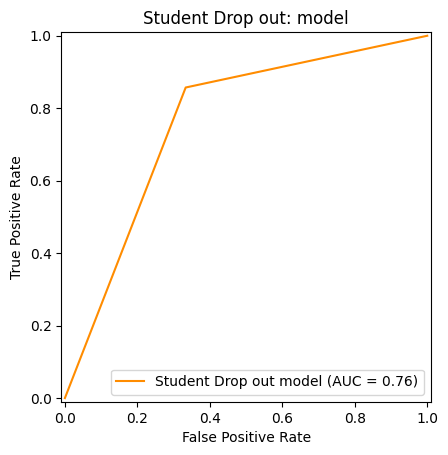

In [6]:
hpo = ModelTrainer(random_state=42)
model, feature_importance = hpo.cross_validation_hpo(
    x=x, y=y,
    search_space=search_space, 
    folds=5,
    algo='xgb'
    )

In [7]:
feature_importance

,Feature,Importance
4,M05_1_N,0.259913
3,M04_1_N,0.224045
5,M06_1_N,0.143111
0,M01_1_N,0.133912
1,M02_1_N,0.120553
2,M03_1_N,0.118467


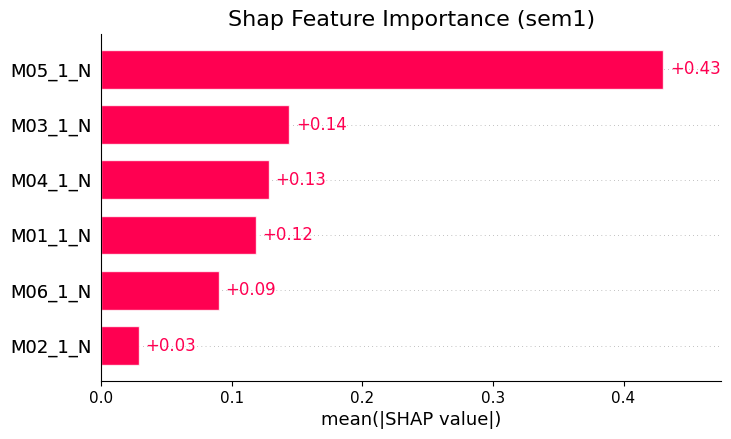

In [8]:
## Shap Global explainations
import shap
explainer = shap.Explainer(model['model'], model['x_train'])
shap_values = explainer(model['x_test'])

plt.title('Shap Feature Importance (sem1)', fontsize=16)
shap.plots.bar(shap_values)

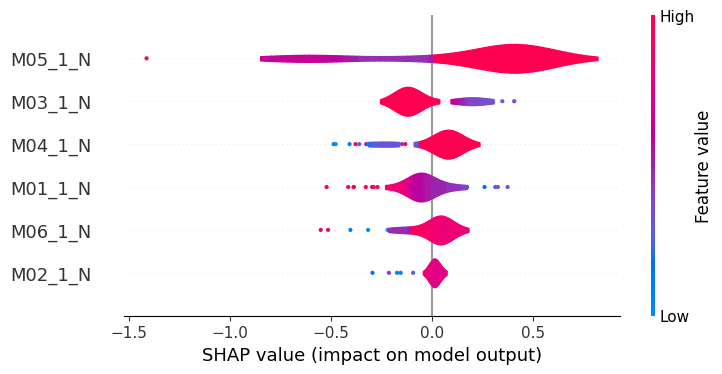

In [9]:
shap.plots.violin(shap_values, show=True)

In [10]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values, link='logit')

In [11]:
hpo.plot_shap_force(model=model, shap_values=shap_values, student_index=11, model_name='xgb')

Student index 11 grades:
         grades
M01_1_N     1.0
M02_1_N     1.0
M03_1_N     5.1
M04_1_N     1.0
M05_1_N     5.1
M06_1_N     1.0
Status: 0, Prediction: [0], Probability [0]: 0.534, Probability [1]: 0.466


In [12]:
hpo.plot_shap_force(model=model, shap_values=shap_values, student_index=24, model_name='xgb')

Student index 24 grades:
         grades
M01_1_N     1.7
M02_1_N     2.0
M03_1_N     1.3
M04_1_N     2.0
M05_1_N     1.3
M06_1_N     2.0
Status: 0, Prediction: [0], Probability [0]: 0.723, Probability [1]: 0.277


In [13]:
hpo.plot_shap_force(model=model, shap_values=shap_values, student_index=10, model_name='xgb')

Student index 10 grades:
         grades
M01_1_N     2.3
M02_1_N     5.1
M03_1_N     5.1
M04_1_N     2.0
M05_1_N     5.1
M06_1_N     2.3
Status: 1, Prediction: [1], Probability [0]: 0.297, Probability [1]: 0.703


In [14]:
hpo.plot_shap_force(model=model, shap_values=shap_values, student_index=4, model_name='xgb')

Student index 4 grades:
         grades
M01_1_N     1.0
M02_1_N     1.7
M03_1_N     1.3
M04_1_N     1.0
M05_1_N     1.0
M06_1_N     1.0
Status: 0, Prediction: [0], Probability [0]: 0.771, Probability [1]: 0.229


## BHT semester 2 

In [15]:
# Count occurrences of each unique value in the 'status' column
counter_2 = Counter(BHT_2['status'])
print(f'Quantity of Drop Out and Degree in THL-2: \n 1: {counter_2[1]} | 0: {counter_2[0]}')
hpo2 = ModelTrainer(random_state=72)
x2, y2 = hpo2.split_data(BHT_2, module2)

Quantity of Drop Out and Degree in THL-2: 
 1: 190 | 0: 47


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:02<00:00,  3.73trial/s, best loss: -0.6495506912442396]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            02               08
	 actual 1            06               32

Model parameters:
{'objective': 'binary:logistic', 'base_score': None, 'booster': 'gbtree', 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.9955885584770593, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': 0.5764677200036097, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': 0.6137375788794348, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 72, 'reg_alpha': None, 'reg_lambda': 0.028301850205580167, '

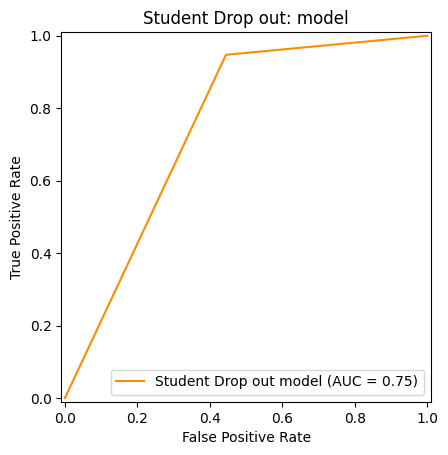

In [16]:
model_2, feature_importance_2 = hpo2.cross_validation_hpo(
    x=x2, y=y2,
    search_space=search_space, 
    folds=5,
    algo='xgb'
    )

In [17]:
feature_importance_2

,Feature,Importance
10,M11_2_N,0.124688
8,M09_2_N,0.123653
7,M08_2_N,0.106106
6,M07_2_N,0.104873
2,M03_2_N,0.094610
3,M04_2_N,0.085419
9,M10_2_N,0.080488
0,M01_2_N,0.079027
4,M05_2_N,0.075802
5,M06_2_N,0.070447


#### Shap analysis

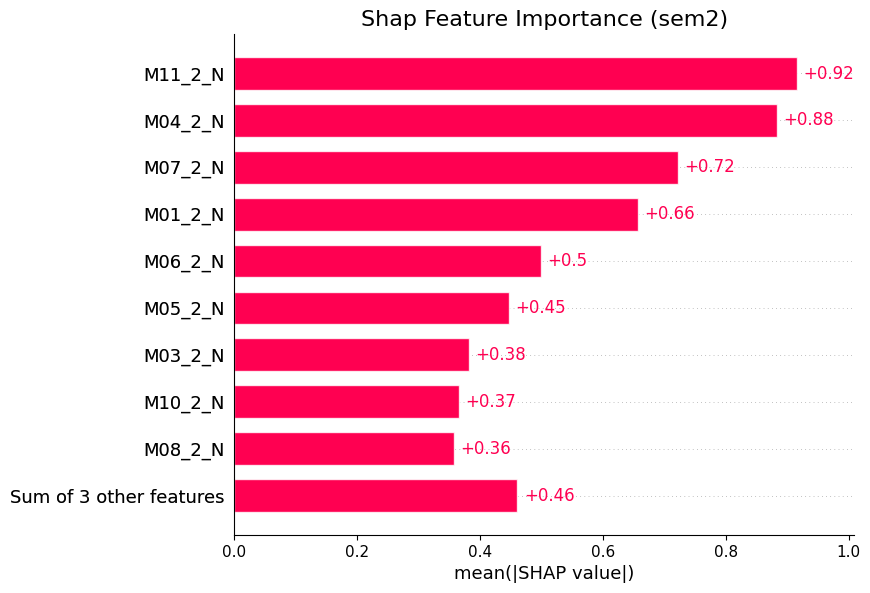

In [18]:
## Shap Global explainations
import shap
explainer2 = shap.Explainer(model_2['model'], model_2['x_train'])
shap_values2 = explainer2(model_2['x_test'])

plt.title('Shap Feature Importance (sem2)', fontsize=16)
shap.plots.bar(shap_values2)

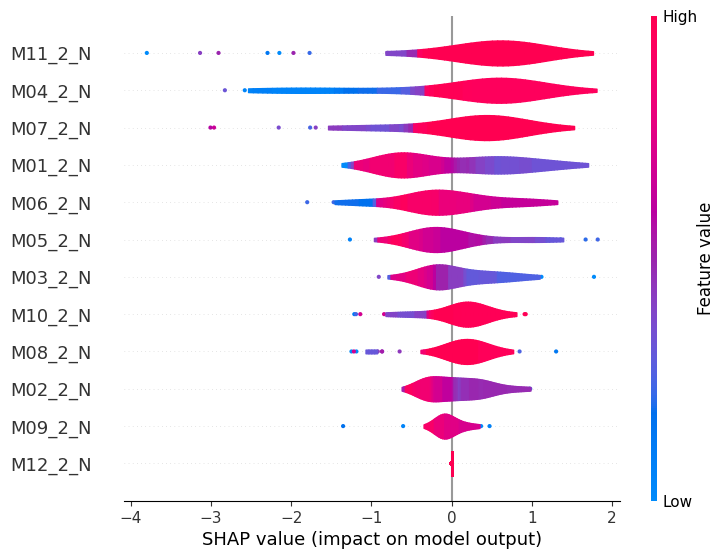

In [19]:
shap.plots.violin(shap_values2, show=True)

In [20]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values2, link='logit')

In [21]:
hpo2.plot_shap_force(model=model_2, shap_values=shap_values2, student_index=33, model_name='xgb')

Student index 33 grades:
         grades
M01_2_N     1.0
M02_2_N     1.0
M03_2_N     1.0
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     1.0
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.001, Probability [1]: 0.999


In [22]:
hpo2.plot_shap_force(model=model_2, shap_values=shap_values2, student_index=11, model_name='xgb')

Student index 11 grades:
         grades
M01_2_N     5.1
M02_2_N     5.1
M03_2_N     5.1
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     5.1
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 0, Prediction: [1], Probability [0]: 0.038, Probability [1]: 0.962


In [23]:
hpo2.plot_shap_force(model=model_2, shap_values=shap_values2, student_index=2, model_name='xgb')

Student index 2 grades:
         grades
M01_2_N     3.0
M02_2_N     4.0
M03_2_N     5.1
M04_2_N     5.0
M05_2_N     5.1
M06_2_N     3.0
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.000, Probability [1]: 1.000


In [24]:
hpo2.plot_shap_force(model=model_2, shap_values=shap_values2, student_index=5, model_name='xgb')

Student index 5 grades:
         grades
M01_2_N     3.0
M02_2_N     5.1
M03_2_N     3.0
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     4.0
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.002, Probability [1]: 0.998


## BHT semester 3

In [25]:
# Count occurrences of each unique value in the 'status' column
counter_3 = Counter(BHT_3['status'])
print(f'Quantity of Drop Out and Degree in THL-1: \n 1: {counter_3[1]} | 0: {counter_3[0]}')
# Count occurrences of each unique value in the 'status' column
hpo3 = ModelTrainer(random_state=42)
x3, y3 = hpo3.split_data(BHT_3, module3)

Quantity of Drop Out and Degree in THL-1: 
 1: 134 | 0: 48


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:02<00:00,  3.41trial/s, best loss: -0.755465367965368]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            09               01
	 actual 1            04               23

Model parameters:
{'objective': 'binary:logistic', 'base_score': None, 'booster': 'gbtree', 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8554165707218202, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': 0.21392989013865196, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 8, 'max_leaves': None, 'min_child_weight': 1.925449467772579, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': 0.040656214079402196, 's

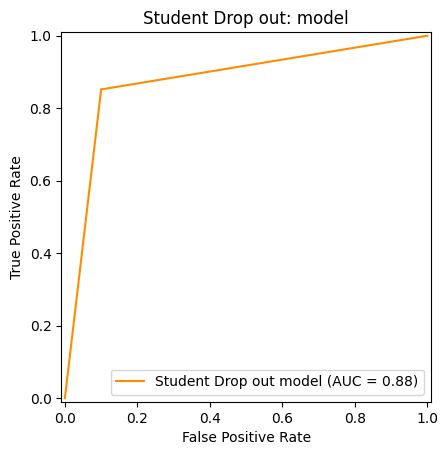

In [26]:
model_3, feature_importance_3 = hpo3.cross_validation_hpo(
    x=x3, y=y3,
    search_space=search_space, 
    folds=5,
    algo='xgb'
    )

In [27]:
feature_importance_3

,Feature,Importance
12,M13_3_N,0.164210
13,M14_3_N,0.120657
9,M10_3_N,0.114085
11,M12_3_N,0.073477
1,M02_3_N,0.064793
16,M17_3_N,0.059224
8,M09_3_N,0.059155
14,M15_3_N,0.052557
15,M16_3_N,0.048173
2,M03_3_N,0.045909


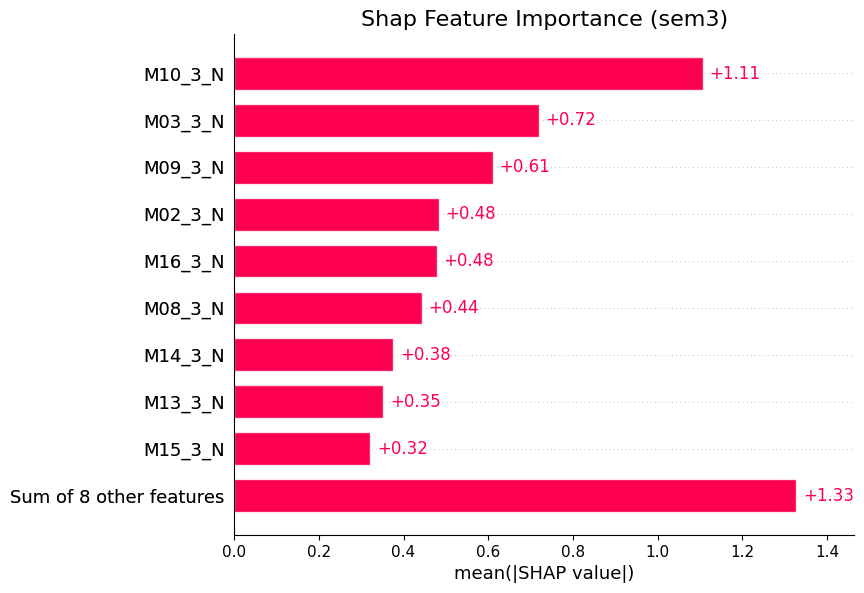

In [28]:
## Shap Global explainations
import shap
explainer3 = shap.Explainer(model_3['model'], model_3['x_train'])
shap_values3 = explainer3(model_3['x_test'])

plt.title('Shap Feature Importance (sem3)', fontsize=16)
shap.plots.bar(shap_values3)

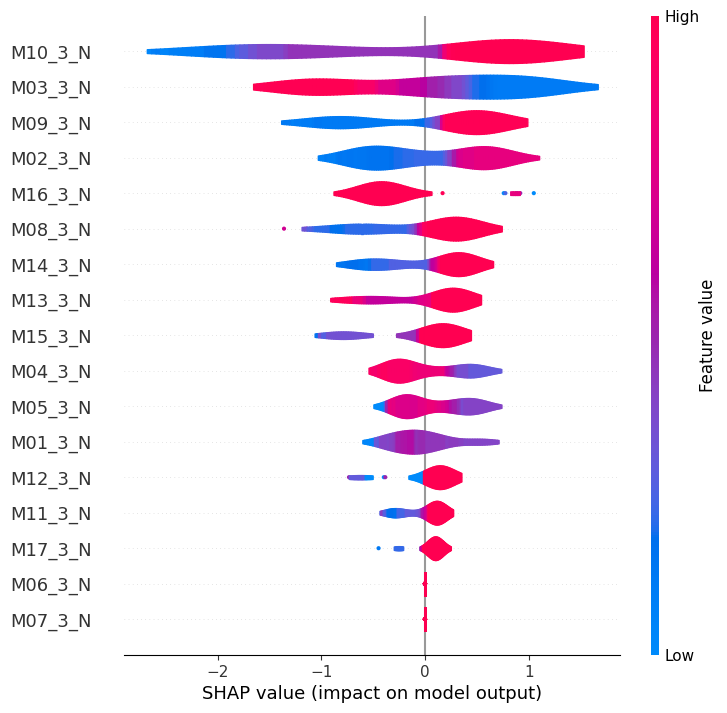

In [29]:
shap.plots.violin(shap_values3, show=True)

In [30]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values3, link='logit')

In [31]:
hpo3.plot_shap_force(model=model_3, shap_values=shap_values3, student_index=1, model_name='xgb')

Student index 1 grades:
         grades
M01_3_N     1.3
M02_3_N     2.3
M03_3_N     1.7
M04_3_N     1.7
M05_3_N     2.0
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     1.3
M09_3_N     1.0
M10_3_N     1.0
M11_3_N     2.7
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     1.7
M15_3_N     1.3
M16_3_N     5.1
M17_3_N     1.0
Status: 1, Prediction: [0], Probability [0]: 0.987, Probability [1]: 0.013


In [32]:
hpo3.plot_shap_force(model=model_3, shap_values=shap_values3, student_index=4, model_name='xgb')

Student index 4 grades:
         grades
M01_3_N     4.0
M02_3_N     2.7
M03_3_N     2.3
M04_3_N     4.0
M05_3_N     2.3
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     1.7
M09_3_N     1.3
M10_3_N     3.7
M11_3_N     3.0
M12_3_N     5.1
M13_3_N     3.0
M14_3_N     3.3
M15_3_N     2.3
M16_3_N     3.0
M17_3_N     3.0
Status: 0, Prediction: [0], Probability [0]: 0.878, Probability [1]: 0.122


In [33]:
hpo3.plot_shap_force(model=model_3, shap_values=shap_values3, student_index=14, model_name='xgb')

Student index 14 grades:
         grades
M01_3_N     5.1
M02_3_N     1.0
M03_3_N     5.1
M04_3_N     1.0
M05_3_N     2.3
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     2.3
M09_3_N     1.7
M10_3_N     2.0
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     1.3
M14_3_N     1.0
M15_3_N     1.3
M16_3_N     5.1
M17_3_N     5.1
Status: 0, Prediction: [0], Probability [0]: 0.973, Probability [1]: 0.027
